# 4.2 Exercises: Scatterplots, Bubble Charts, & Density Plots - R
Michael Hotaling

In [20]:
library(ggplot2)
library(dplyr)
library(ggrepel)
library(scales)

In [21]:
crimerate <- read.csv("crimerates-by-state-2005.csv", stringsAsFactors = FALSE) %>% 
subset(!state %in% c("United States", "District of Columbia")) 

# Scatter Plot

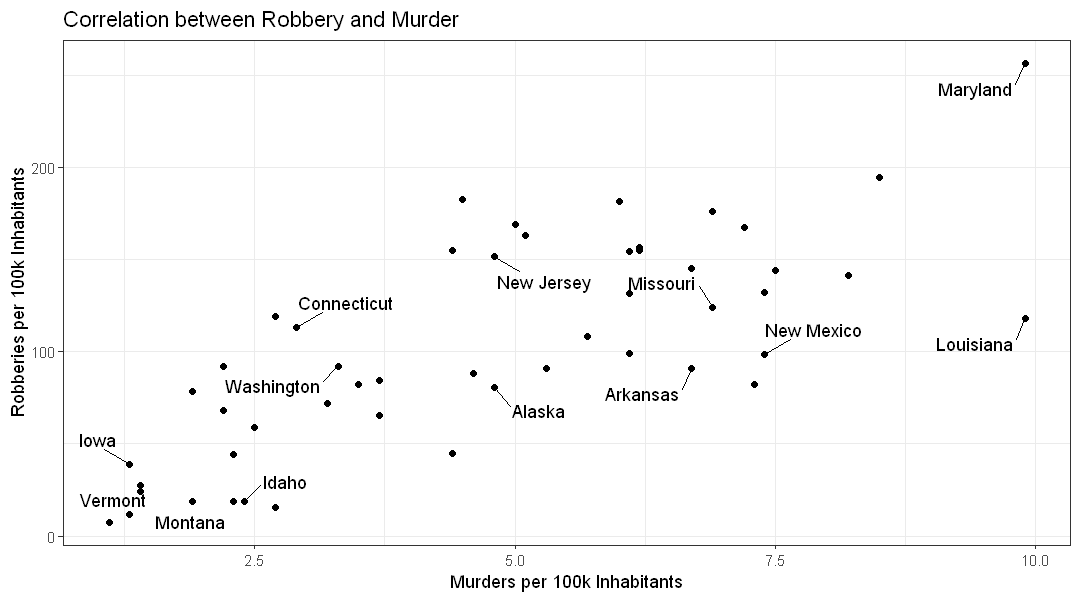

In [24]:
options(repr.plot.width = 9, repr.plot.height = 5)

crimerate %>% mutate(
    state = ifelse(runif(n()) > 0.25, "", crimerate$state)) %>%
    ggplot(aes(x = murder, y = robbery)) +
    geom_point() + 
    labs(title = "Correlation between Robbery and Murder",
         x = "Murders per 100k Inhabitants",
         y = "Robberies per 100k Inhabitants") +
    geom_text_repel(aes(label=state), 
                    max.overlaps = Inf, 
                    box.padding = 0.7, ) + 
    theme_bw()

# Bubble Plot

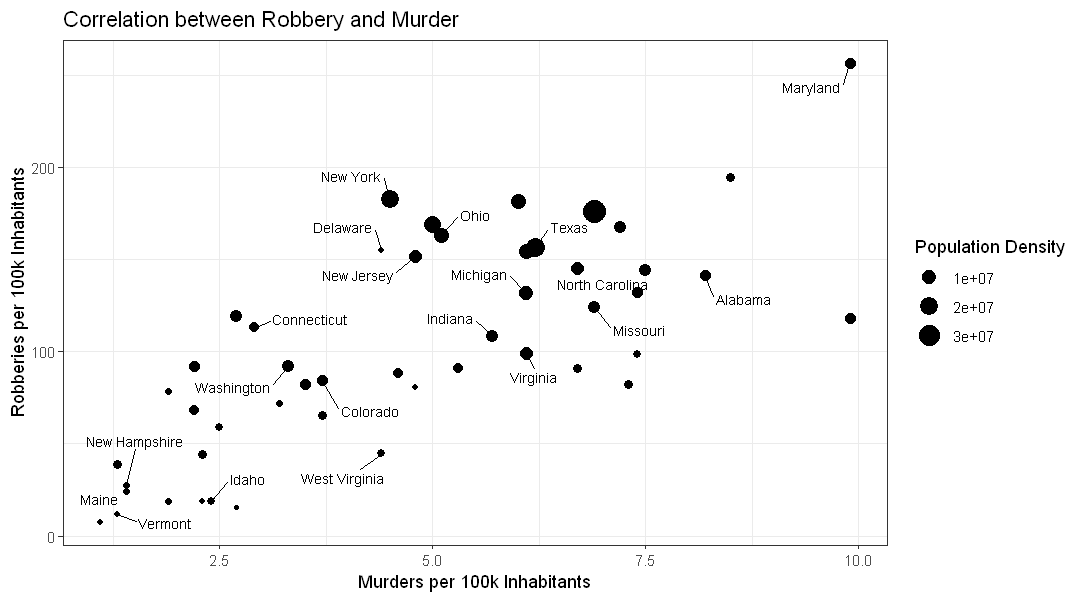

In [25]:
options(repr.plot.width = 9, repr.plot.height = 5)

crimerate %>% mutate(
    state = ifelse(runif(n()) < 0.75, "", crimerate$state)) %>%
    ggplot(aes(x = murder, y = robbery, size = population)) +
    geom_point() + 
    labs(title = "Correlation between Robbery and Murder",
         x = "Murders per 100k Inhabitants",
         y = "Robberies per 100k Inhabitants", size = "Population Density") +
    geom_text_repel(aes(label=state), size = 3, 
                    max.overlaps = Inf, 
                    box.padding = 0.7, ) + 
    theme_bw()

# Density Plot

In [26]:
df <- read.csv("state_data.csv")
colnames(crimerate)[1] <- "State"
crimerate2 <- merge(crimerate,df,by=c("State"))

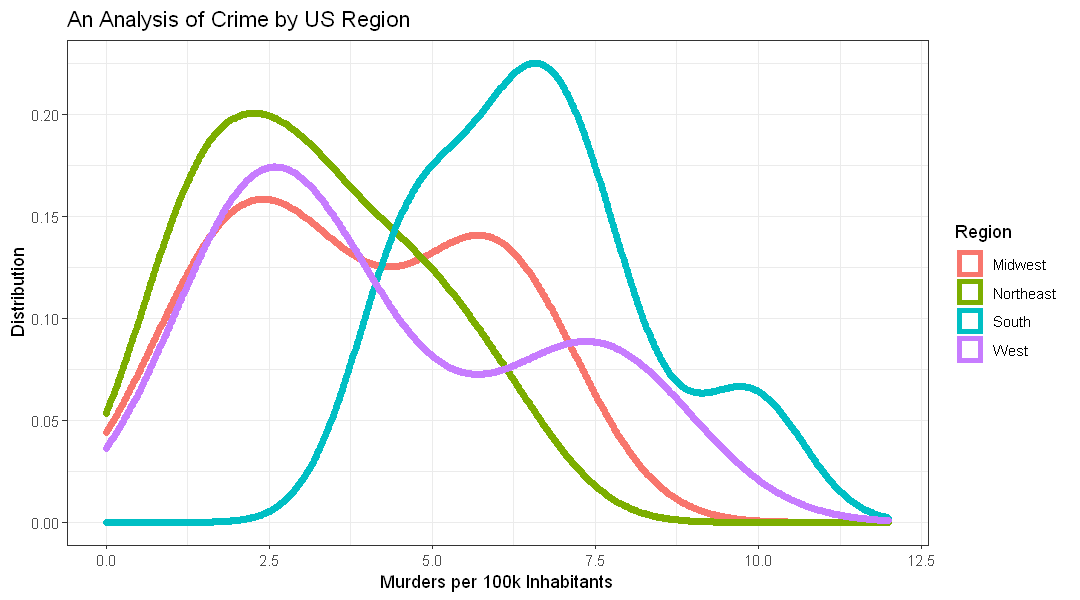

In [28]:
ggplot(data = crimerate2, aes(x = murder, color = Region)) + 
geom_density(size = 2) + 
xlim(0,12) +
xlab("Murders per 100k Inhabitants") + 
ylab("Distribution") + 
ggtitle("An Analysis of Crime by US Region") + 
theme_bw()